Install the required libraries for LDA clustering.

In [ ]:
!pip install umap-learn
!pip install tensorflow==1.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 2.1 MB/s 
     |████████████████████████████████| 1.1 MB 7.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ef1cd4ad1a20ce03098c628681de9448a0adb7d10f16b197bc4eb8510a59de3c
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=6651c82afbafc1bdd241595c585b8d79cd51bc16f7293c08f01fd18f7dc3f0c0
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 15 kB/s 
     |████████████████████████████████| 3.8 MB 28.0 MB/s 

In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 12.6 MB/s 
     |████████████████████████████████| 76 kB 2.7 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=0d37c91d0f6461c81dbfe34653c0e3d1628640faa0ca63d95a8d58f44cd522a2
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the required libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_hub as hub
import umap
import umap.plot

Loading the Google Universal Sentence Encoder Model and storing it in model

In [9]:
googele_encoder_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(googele_encoder_url)
print ("universal sentence encoder module loaded")

universal sentence encoder module loaded


In [10]:
def embed(input):
  return model([input])

Load the preprocessed data with  labels

In [13]:
df=pd.read_csv('../../dataset/newsgroup-preprocessed-data.csv')
df.tail()

,label,text
18265,sci.med,dn david dn dn consultation cheaper scan diffe...
18266,sci.electronics,isolated ground usually unusual color orange y...
18267,comp.sys.ibm.pc.hardware,installed dx2 [number] cpu clone motherboard t...
18268,comp.graphics,wouldn require sphere [number] space [number] ...
18269,rec.autos,tip gary cc utah phone pontiac systems custome...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   18270 non-null  object
 1   text    18270 non-null  object
dtypes: object(2)
memory usage: 285.6+ KB


Sentence embedding are created for each text in the dataframe

In [15]:
df['sentence_embedding'] = df['text'].apply(embed)

In [16]:
df=pd.DataFrame(data=df)
df.head()

,label,text,sentence_embedding
18265,sci.med,dn david dn dn consultation cheaper scan diffe...,"((tf.Tensor(-0.05282538, shape=(), dtype=float..."
18266,sci.electronics,isolated ground usually unusual color orange y...,"((tf.Tensor(-0.06648626, shape=(), dtype=float..."
18267,comp.sys.ibm.pc.hardware,installed dx2 [number] cpu clone motherboard t...,"((tf.Tensor(-0.04856616, shape=(), dtype=float..."
18268,comp.graphics,wouldn require sphere [number] space [number] ...,"((tf.Tensor(-0.027611984, shape=(), dtype=floa..."
18269,rec.autos,tip gary cc utah phone pontiac systems custome...,"((tf.Tensor(-0.029698698, shape=(), dtype=floa..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   label               18270 non-null  object
 1   text                18270 non-null  object
 2   sentence_embedding  18270 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [19]:
embedddings=df['sentence_embedding']
embedddings.shape

(18270,)

In [20]:
embeddidngs_new = np.array([x.numpy() for x in embedddings]).reshape((df.shape[0],512))
embeddidngs_new.shape

(18270, 512)

Using LinearDiscriminationAnalysis.fit() to train the model on the generated embeddings

In [21]:
X = embeddidngs_new
Y= df['label'].values
mod = LinearDiscriminantAnalysis()
mod.fit(X, Y)

LinearDiscriminantAnalysis()

Using counter to count the number of articles predicted for each category

In [24]:
from collections import Counter
Counter(mod.predict(embeddidngs_new))

Counter({'rec.sport.hockey': 876,
         'comp.sys.ibm.pc.hardware': 1017,
         'talk.politics.mideast': 817,
         'sci.electronics': 1118,
         'comp.sys.mac.hardware': 903,
         'talk.religion.misc': 573,
         'talk.politics.misc': 1078,
         'alt.atheism': 844,
         'rec.motorcycles': 918,
         'rec.autos': 883,
         'comp.windows.x': 872,
         'comp.graphics': 1003,
         'sci.space': 972,
         'talk.politics.guns': 913,
         'comp.os.ms-windows.misc': 974,
         'sci.med': 889,
         'sci.crypt': 806,
         'rec.sport.baseball': 871,
         'misc.forsale': 1012,
         'soc.religion.christian': 931})

In [25]:
preds = mod.predict(embeddidngs_new)

Evaluation metrics 

In [33]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df.label, preds))
print("Completeness: %0.3f" % metrics.completeness_score(df.label, preds))
print("V-measure: %0.3f" % metrics.v_measure_score(df.label, preds))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(df.label, preds))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(embeddidngs_new, preds, sample_size=900))

Homogeneity: 0.583
Completeness: 0.584
V-measure: 0.584
Adjusted Rand-Index: 0.491
Silhouette Coefficient: 0.012


# Visualisation using UMAP

In [26]:
embedding = umap.UMAP(n_components=2).fit(embeddidngs_new)

In [27]:
import seaborn as sns

In [29]:
from sklearn import metrics
import colorcet as cc
color_palette = sns.color_palette(cc.glasbey, n_colors=20)

Preparing data for visualisation

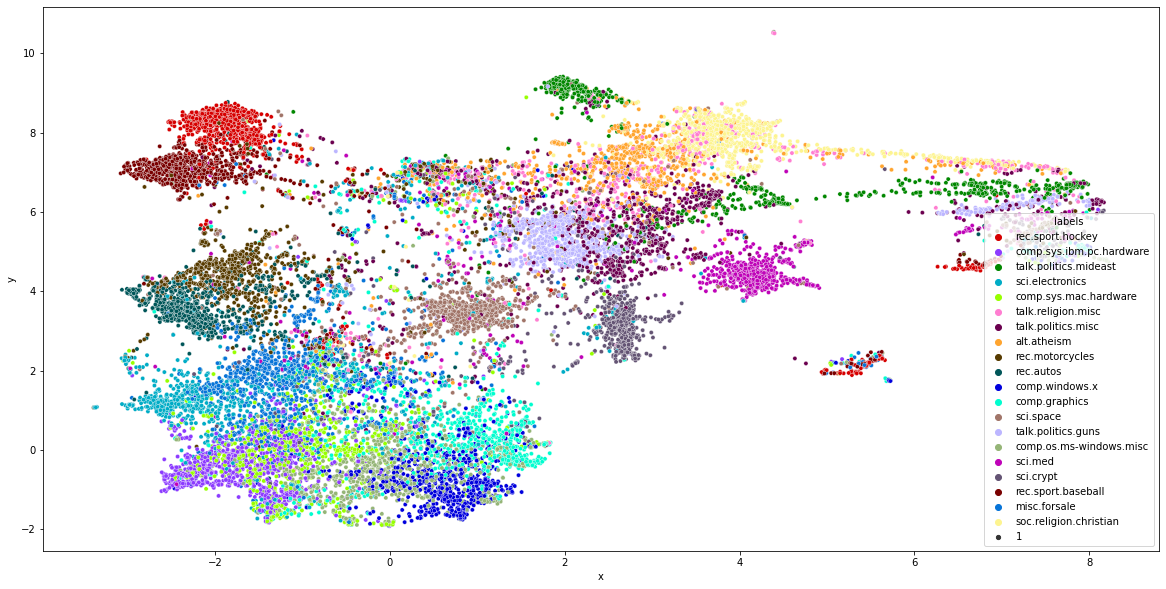

In [31]:

data = embedding.fit_transform(embeddidngs_new)
result = pd.DataFrame(data, columns=['x', 'y'])
result['labels'] = preds


figure, axes = plt.subplots(figsize=(20, 10))
# outliers = result.loc[result.labels == -1, :]
# clustered = result.loc[result.labels != -1, :]
sns.scatterplot(data=result, x="x", y="y", size=1, hue="labels", palette=color_palette)

# Visualisation using t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


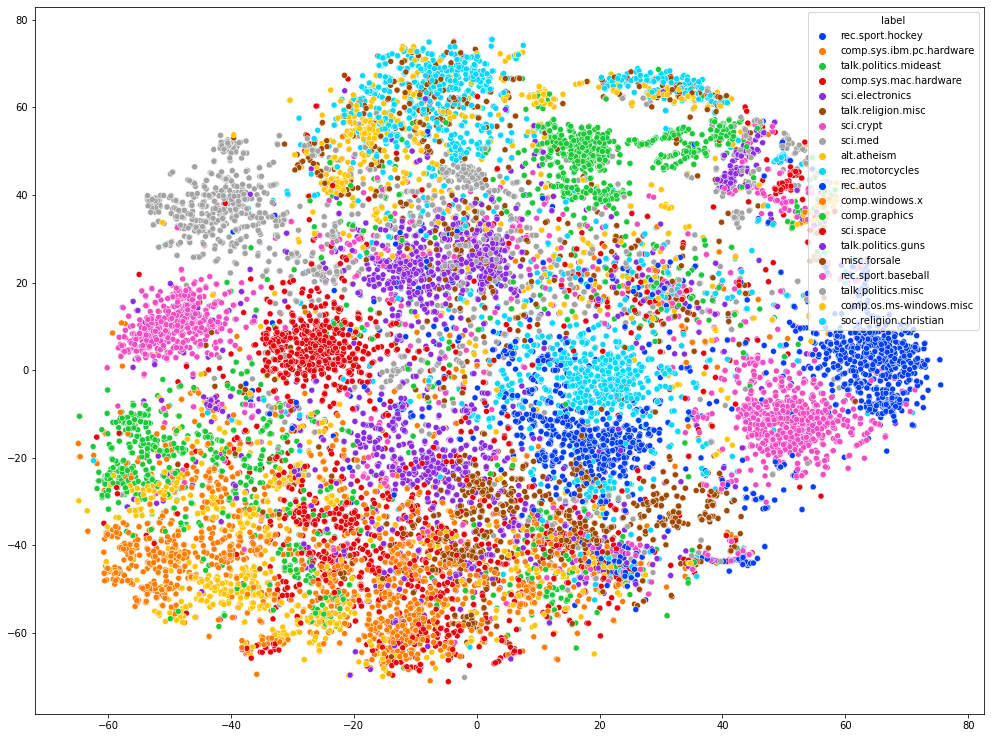

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE()
data = tsne.fit_transform(embeddidngs_new)
color_palette = sns.color_palette("bright", 20)
plt.figure(figsize=(17,13))
sns.scatterplot(data[:,0], data[:,1], hue=df['label'], palette=color_palette)

# Visualisation usning CompressionVAE

In [35]:
!pip install cvae

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# Import CVAE 
from cvae import cvae
# Initialise the tool, assuming we already have an array X containing the data 
embedder = cvae.CompressionVAE(embeddidngs_new)
# Train the model 
embedder.train()

Total amount of data:  16443
Input feature dimension:  512
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  1827
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from /content/temp ... No checkpoint found.
No model found to restore. Initialising new model.
Starting queues.
Reader threads started.
step 0; epoch 0.00 - loss = 253.176, test_loss = 257.378, lr = 0.00100, (0.031 sec/step)
Storing checkpoint to /content/temp ... Done.
step 50; epoch 0.19 - loss = 253.597, test_loss = 255.290, lr = 0.00100, (0.008 sec/step)
step 100; epoch 0.39 - loss = 251.122, test_loss = 247.072, lr = 0.00100, (0.009 sec/step)
step 150; epoch 0.58 - loss = 248.439, test_loss = 244.737, lr = 0.00100, (0.009 sec/step)
step 200; epoch 0.78 - loss = 246.603, test_loss = 242.077, lr = 0.00100, (0.010 sec/step)
step 250; epoch 0.97 - loss = 245.126, test_loss = 238.342, lr = 0.00100, (0.

In [40]:
z = embedder.embed(embeddidngs_new)

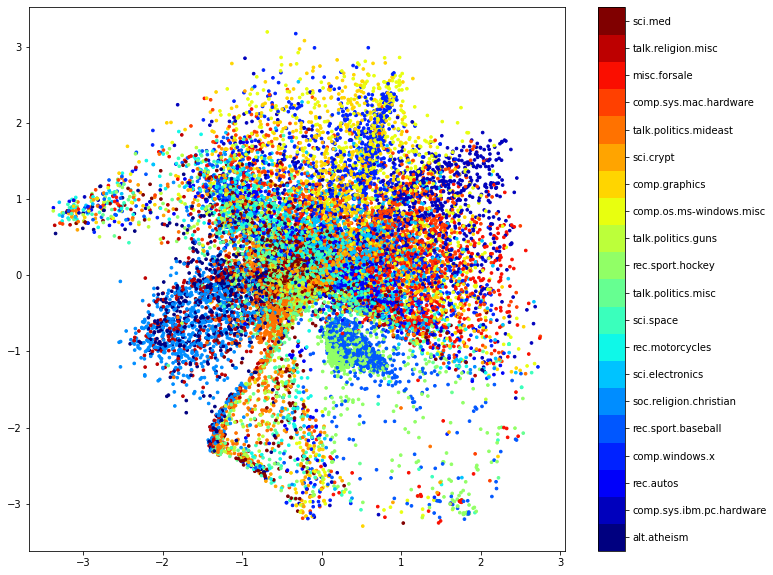

In [41]:
embedder.visualize(z, labels=df['label'].values)